# Medical Insurance Cost Prediction


## Data Preprocessing
- Label Encoding
- Data Visualization
    - Scatter Plot
    - Distribution Plot
    - Count Plot
    - Correlation
- Data split

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load dataset

dataset = pd.read_csv('/kaggle/input/insurance/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Label Encoding
There is no missing value in the dataset. So no imputation is needed. But we can see there are three catagorical features ( sex, smoker, region ). We need to convert them to numarical. Here we will use <b> LabelEncoder </b> to convert the catagorical features.

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
dataset['sex'] = encoder.fit_transform(dataset['sex'])
dataset['smoker'] = encoder.fit_transform(dataset['smoker'])
dataset['region'] = encoder.fit_transform(dataset['region'])

In [9]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Data Visualization
Here we will visualize the correlation and other visual Representation like scatter plot of all the features as we don't have much feature.

#### Scatter Plot
Analyzing the plots we have found out that
- Age : charges increases with age.
- Sex, Region : charges doesn't depend on it much.
- Children : charges decreases with children. More children less charge.
- Smoker : if smoker charges may increase.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# See the scatter plots 
output_variable = 'charges'  # Replace with the actual name of your output variable

for column in dataset.columns:
    if column != output_variable:
        plt.scatter(dataset[column], dataset[output_variable])
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Scatter plot of {column} vs {output_variable}')
        plt.show()

### Distribution Plot
All the columns with continuous values are show in distribution plots. Analyzing them we found that

- Age : okay, dataset contains more data of age 20 or below.
- BMI : Normal Distribution. But Most of the data represents obese
- Charges : Most of the data is less then 15000. 

In [ ]:
# Distribution Plot for continuous data

for column in ['age', 'bmi', 'charges']:
    plt.figure(figsize = (6, 6))
    sns.displot(dataset[column])
    plt.title(f'{column} distribution')
    plt.show()

### Count Plot
Here we can visualize the count plots that are useful for catagorical data or discrete data. Here, it is notable that
 
- Smoker : # of smoker is less compared to non smoker
- Children : Most of the data is of  # children 0, 1



In [ ]:
# Count Plot for catagorical data

for column in ['sex', 'children', 'region', 'smoker']:
    plt.figure(figsize = (6,6))
    sns.countplot(x = column, data = dataset)
    plt.title(f'{column} count plot')
    plt.show()

### Correlation

It is clear from the correlation that <b> Age, BMI, Smoker </b> are positively correlated. These are the most important features in this case study.

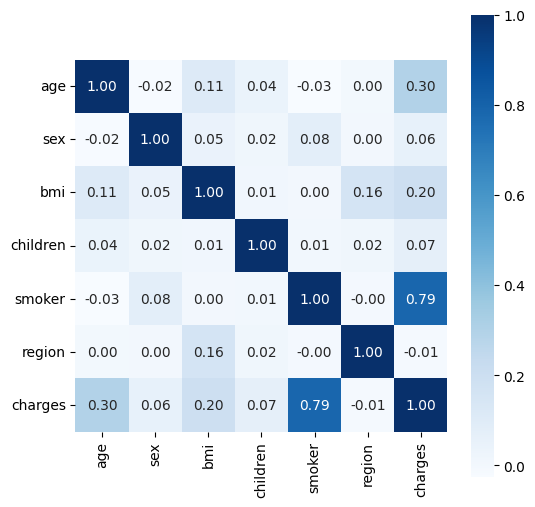

In [19]:
corr = dataset.corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr, cbar = True, cmap = 'Blues', square = True, annot = True, fmt ='.2f')
plt.show()

## Data Seperation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = dataset.drop('charges', axis = 1)
y = dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

## Model Training

Two models were trained for the dataset. Linear Regression and SGDRegressor. Both perform similarly.

In [27]:
from sklearn.linear_model import SGDRegressor, LinearRegression


In [37]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(X_norm, y_train)

SGDRegressor()

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluation

For Evaluation we are using only R square error

In [39]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, sgdr.predict(scaler.fit_transform(X_test)))
r2_lr = r2_score(y_test, lr.predict(X_test))
print(f' SGDRegressor : {r2} || Linear Regression : {r2_lr}')

 SGDRegressor : 0.7833771219641732 || Linear Regression : 0.7833463107364539



```
Author: Anam Ibn Jafar
Email: anamibnjafar@gmail.com
LinkedIn: www.linkedin.com/in/ibn-jafar
Kaggle: https://www.kaggle.com/anamibnjafar0
Date: 23/10/2023
```
